# Name : Soma Niteesh

# Task-1 Prediction using Supervised learning
# Predict Student score based on no of study hours

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape

(25, 2)

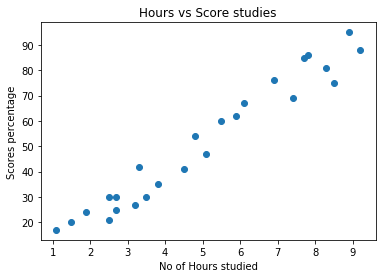

In [10]:
plt.scatter(df["Hours"],df["Scores"])
plt.xlabel("No of Hours studied")
plt.ylabel("Scores percentage")
plt.title("Hours vs Score studies")
plt.show()

In [12]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [13]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [16]:
X_train.shape

(20, 1)

In [17]:
X_test.shape

(5, 1)

In [19]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [22]:
line=model.coef_*X+model.intercept_
line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

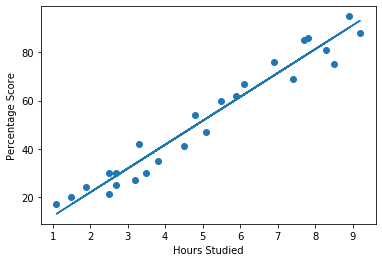

In [24]:
plt.scatter(X,y)
plt.plot(X,line)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

## predictions

In [25]:
y_pred=model.predict(X_test)

In [26]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [27]:
pred=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [29]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
np.mean(scores)

0.9180771341891049

In [30]:
from sklearn import metrics  
metrics.r2_score(y_test,y_pred)

0.9454906892105356

In [31]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [36]:
hours = 9.25
own_pred = model.predict([[hours]])

In [44]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
